In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import math

## Clinical analysis

In [50]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [9]:
df.columns

Index(['PFS_P', 'PFS_P_CNSR', 'TRT01P', 'HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA',
       'PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA'],
      dtype='object')

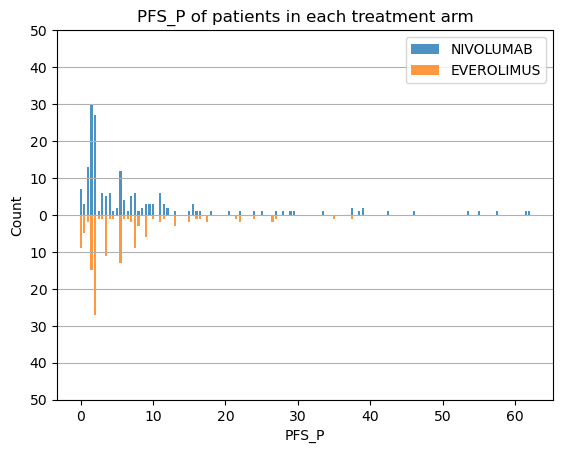

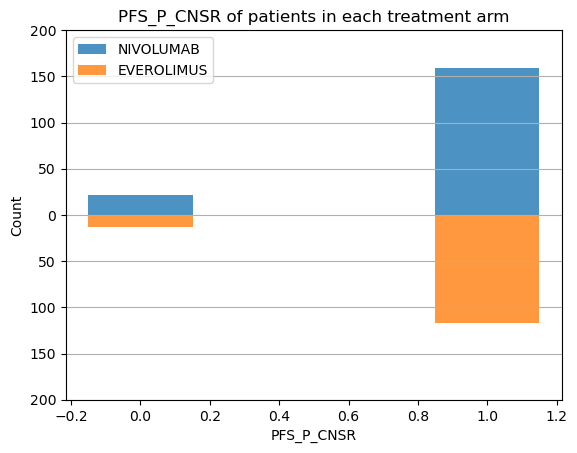

KeyError: 'HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA'

In [51]:
cohorts = [df[df['TRT01P'] == 'Avelumab+Axitinib'], 
           df[df['TRT01P'] == 'Sunitinib']]
names = ['Avelumab+Axitinib', 'Sunitinib']

cohorts = [df[df['TRT01P'] == 'NIVOLUMAB'], 
           df[df['TRT01P'] == 'EVEROLIMUS']]
names = ['NIVOLUMAB', 'EVEROLIMUS']

biomarkers = ['PFS_P', 'PFS_P_CNSR', 'HE_TUMOR_CELL_CONTENT_IN_TUMOR_AREA',
              'PD-L1_TOTAL_IMMUNE_CELLS_PER_TUMOR_AREA'
             ]

WIDTH = .3

for bio in biomarkers:
    maxCount = -1
    step = 1
    for idx, cohort_df in enumerate(cohorts):
        # round(x * 2) / 2 rounds to the nearest .5 => round(2.4 * 2) / 2 = round(4.8) / 2 = 5 / 2 = 2.5
        rounded_list = None

        nan_values = cohort_df[bio].isna().sum()
        
        values = cohort_df[bio].dropna().values
        if len(set(values)) > 10:
            rounded_list = pd.array([round(x * 2) / 2 for x in values])
        else:
            rounded_list = pd.array([x for x in values])
            
        counts = rounded_list.value_counts()
        
        keys = counts.keys()
        values = counts.values


        
        if (max(max(values),nan_values) > maxCount):
            maxCount = (max(max(values),nan_values) + 50) - (max(max(values),nan_values) % 50)
            
        if idx == 1:
            values = -values
        plt.bar(keys, values, alpha = .8, width = WIDTH, label = names[idx])
        
        # Plot gray bars for NaN values
        if nan_values > 0:
            plt.bar(-1, nan_values, alpha=.8, width= WIDTH, color='gray', label='NaN' if idx == 0 else '', bottom=-nan_values if idx == 0 else 0)

    if (maxCount > 100):
        step = 50
    else:
        step = 10
    
    plt.yticks(np.arange(-maxCount,maxCount+(step-1),step), abs(np.arange(-maxCount,maxCount+(step-1),step)))
    plt.title(bio + " of patients in each treatment arm")
    plt.xlabel(bio)
    plt.ylabel("Count")
    plt.grid(axis = 'y')
    plt.legend()
    plt.show()

In [ ]:
a = df['TCGA_cluster'].fillna(-1)
a[a == -1]

In [ ]:
set(df['TCGA_cluster'])

## Genetic analysis

In [56]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_GeneticData.csv'

# Read the CSV file into a DataFrame
try:
    df_gen = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [60]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df_cli = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [45]:
df_gen

,A4GALT,AAAS,AAMP,ABCA1,ABCA2,ABCB1,ABCB6,ABCG1,ABCG2,ABI1,...,ZMPSTE24,ZNF106,ZNF24,ZNF274,ZNF473,ZNF513,ZRANB1,ZRSR2,ZW10,ZWINT
EA595454,32.171969,34.242601,33.267249,35.857065,33.480007,33.657104,32.273746,33.339276,29.406782,34.258082,...,31.58994,34.69094,32.42176,31.47165,29.93693,33.17524,32.29895,33.28431,31.52522,30.86230
EA595455,32.641512,35.016935,34.419018,35.721381,34.107309,35.570497,33.680042,33.753294,30.356289,33.921299,...,33.70040,35.02163,32.29723,30.87511,30.87169,32.68092,31.86291,33.25893,31.39502,31.50998
EA595473,33.006150,34.260724,34.664401,34.695011,33.236821,34.777532,33.285852,33.303265,30.958198,33.686303,...,32.50897,34.41784,33.27688,31.10884,30.61398,32.79689,31.56140,32.57092,31.25099,30.02328
EA595500,32.052780,34.065914,32.341655,35.629469,34.030106,34.007788,31.869741,32.353024,29.206577,34.111344,...,32.26640,35.51778,32.61753,31.40478,31.23518,33.29764,32.54545,33.95532,32.52081,29.37345
EA595522,33.293074,34.574463,35.250248,35.647750,33.852364,35.094354,33.534954,33.873973,32.120649,34.175609,...,33.29881,34.71216,33.64956,32.28837,30.60883,32.39854,31.77382,32.55807,32.09846,31.00603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCC_73_T_SCR,32.365074,34.742167,33.113039,33.747546,33.931629,33.838323,32.296025,31.642338,30.740420,33.402253,...,32.02075,34.82837,33.17326,31.86836,31.17820,33.59099,32.57067,33.63338,31.81453,30.78532
RCC_90_T_SCR,30.121368,33.792409,34.450999,34.371220,31.799811,31.895951,33.784466,31.870002,29.347511,34.507315,...,32.16958,33.61960,31.56047,31.59540,29.23127,32.77207,30.78896,31.31709,30.65842,31.50200
RCC_93_T_SCR,31.953984,34.146861,33.676334,35.386781,32.611501,33.842290,32.838072,32.987520,29.862937,33.772493,...,32.62316,35.20787,32.46942,31.20456,30.95466,32.07850,31.45327,34.13179,32.56414,30.91066
RCC_96_T_SCR,33.255145,35.138362,33.808583,36.072286,34.598098,34.715293,32.561403,33.959070,29.292590,33.498923,...,31.49508,34.76557,32.63131,32.87016,31.17809,33.03248,31.54103,33.80478,30.91711,28.76312


In [61]:
df_cli

,TRT01P,PFS_P,PFS_P_CNSR
RNA_ID,,,
G138701_RCCBMS-00020-T_v1_RNA_OnPrem,NIVOLUMAB,12.164384,1
G138701_RCCBMS-00097-T_v1_RNA_OnPrem,NIVOLUMAB,5.490411,1
G138701_RCCBMS-00141-T_v1_RNA_OnPrem,NIVOLUMAB,61.906849,0
G138701_RCCBMS-00099-T_v1_RNA_OnPrem,NIVOLUMAB,1.249315,1
G138701_RCCBMS-00163-T_v1_RNA_OnPrem,NIVOLUMAB,5.654795,1
...,...,...,...
RCC_73_T_SCR,NIVOLUMAB,1.906849,1
RCC_90_T_SCR,NIVOLUMAB,1.183562,1
RCC_93_T_SCR,NIVOLUMAB,16.438356,1


In [63]:
df_cli[df_cli['TRT01P'] == 'EVEROLIMUS']

,TRT01P,PFS_P,PFS_P_CNSR
RNA_ID,,,
EA639156,EVEROLIMUS,37.749487,1
P66425-01A-Run1_S1_L001,EVEROLIMUS,7.195072,1
P66425-08E-Run1_S6_L001,EVEROLIMUS,1.938398,1
P66507-02A-Run1_S22_L002,EVEROLIMUS,1.511294,1
P66425-08C-Run1_S5_L001,EVEROLIMUS,1.872690,1
...,...,...,...
P66511-05F-Run1_S12_L001,EVEROLIMUS,9.166324,1
P66511-01B-Run1_S15_L002,EVEROLIMUS,1.872690,1
P66507-06E-Run1_S12_L001,EVEROLIMUS,1.938398,0


In [65]:
df_cli[df_cli['TRT01P'] == 'NIVOLUMAB']['PFS_P_CNSR'].value_counts()

PFS_P_CNSR
1    159
0     22
Name: count, dtype: int64

In [5]:
gene_vals = [x for X in df_gen.values for x in X]

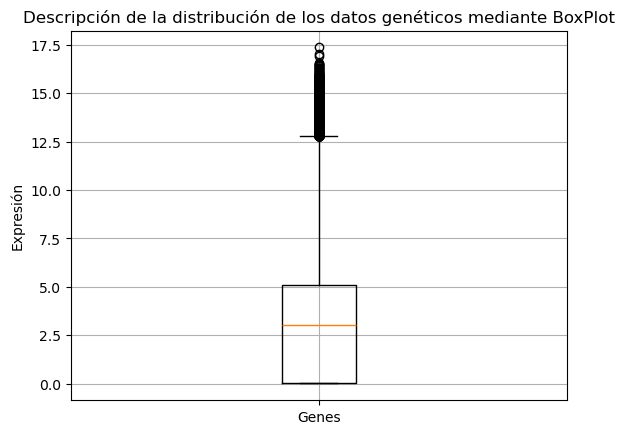

In [16]:
plt.boxplot(gene_vals)
plt.grid(True)
plt.xticks([1], labels=['Genes'])
plt.ylabel("Expresión")
plt.title("Descripción de la distribución de los datos genéticos mediante BoxPlot")
plt.show()

In [17]:
gene_vals = np.array(gene_vals)
mean_val = np.mean(gene_vals)

# Calculate standard deviation
std_val = np.std(gene_vals)

# Calculate median
median_val = np.median(gene_vals)

# Calculate minimum and maximum
min_val = np.min(gene_vals)
max_val = np.max(gene_vals)

# Print the results
print("Mean:", mean_val)
print("Standard Deviation:", std_val)
print("Median:", median_val)
print("Minimum:", min_val)
print("Maximum:", max_val)

Mean: 2.9811656060816065
Standard Deviation: 2.6330352019899554
Median: 3.01
Minimum: 0.01
Maximum: 17.36


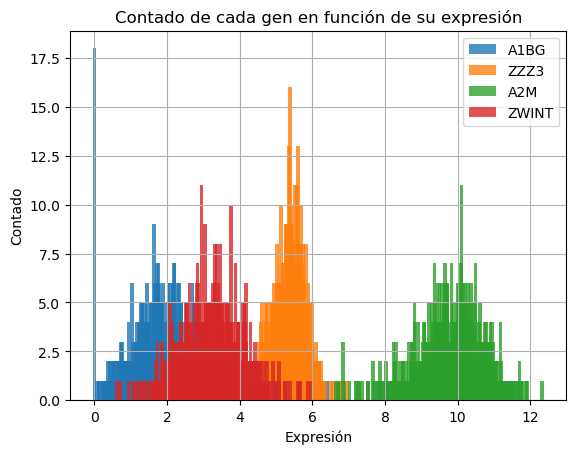

In [18]:
genes = ['A1BG', 'ZZZ3', 'A2M', 'ZWINT']

for gene in genes:
    vals = df_gen[gene].value_counts()
    keys = list(vals.keys())
    values = list(vals.values)
    plt.bar(keys,values,width = .1, label=gene, alpha = 0.8)
    plt.xlabel("Expresión")
    plt.ylabel("Contado")
    plt.title("Contado de cada gen en función de su expresión")
    plt.grid(True)
    plt.legend()

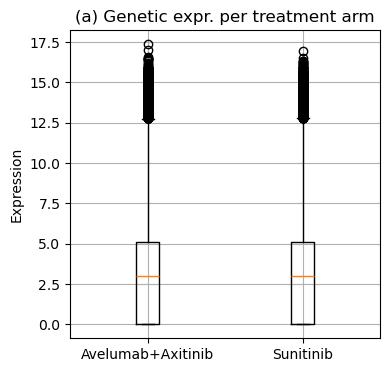

In [58]:
treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
#treatmentGroups = ['NIVOLUMAB', 'EVEROLIMUS']
plt.figure(figsize=(4,4))
for idx, tg in enumerate(treatmentGroups):
    treatment_indices = list(df_cli[df_cli['TRT01P'] == tg].index)
    x = df_gen.loc[treatment_indices].values.flatten()
    plt.boxplot(x, positions = [idx])
plt.grid(True)
plt.xticks([0, 1], labels=treatmentGroups)
plt.ylabel("Expression")
plt.title("(a) Genetic expr. per treatment arm", fontsize = 12)
plt.show()
    

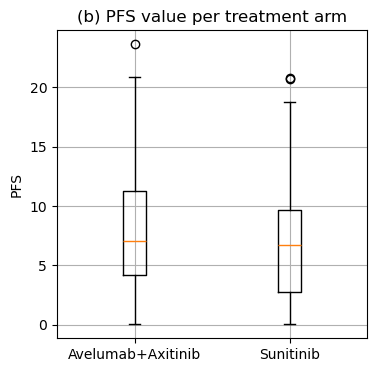

In [59]:
treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
#treatmentGroups = ['NIVOLUMAB', 'EVEROLIMUS']

plt.figure(figsize=(4,4))

for idx, tg in enumerate(treatmentGroups):
    treatment_indices = list(df_cli[df_cli['TRT01P'] == tg].index)
    x = df_cli.loc[treatment_indices]['PFS_P'].values.flatten()
    plt.boxplot(x, positions = [idx])
plt.grid(True)
plt.xticks([0, 1], labels=treatmentGroups)
plt.ylabel("PFS")
plt.title("(b) PFS value per treatment arm")
plt.show()
    

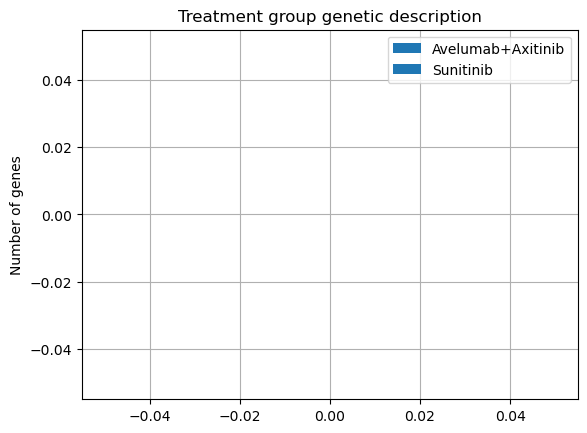

In [41]:
treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
offset = 0.1

for idx, tg in enumerate(treatmentGroups):
    treatment_indices = list(df_cli[df_cli['TRT01P'] == tg].index)
    vals = df_gen.loc[treatment_indices].values.flatten()
    vals = pd.array([round(x * 2) / 2 for x in vals]).value_counts()
    keys = np.array(vals.keys())
    values = list(vals.values)
    plt.bar(keys + offset * idx,values,width = .1, label=tg)
plt.grid(True)
plt.ylabel("Number of genes")
plt.title("Treatment group genetic description")
plt.legend()
plt.show()

In [42]:
treatment_indices = list(df_cli[df_cli['TRT01P'] == 'Avelumab+Axitinib'].index)
vals = df_gen.loc[treatment_indices]
vals

,A4GALT,AAAS,AAMP,ABCA1,ABCA2,ABCB1,ABCB6,ABCG1,ABCG2,ABI1,...,ZMPSTE24,ZNF106,ZNF24,ZNF274,ZNF473,ZNF513,ZRANB1,ZRSR2,ZW10,ZWINT


In [26]:
df_cli[df_cli['TRT01P'] == 'Sunitinib']['PFS_P_CNSR'].value_counts()

PFS_P_CNSR
0    201
1    171
Name: count, dtype: int64

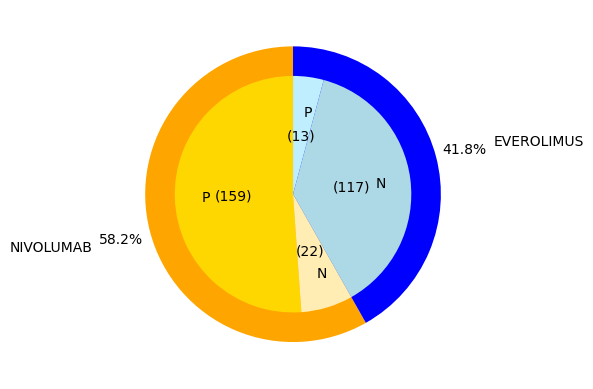

In [47]:
total_length = len(df_cli)
partial_length = -1

def absolute_value(val):
    absolute = np.round(val/100. * total_length, 0)
    return "({:d})".format(int(absolute))

treatmentGroups = ['Avelumab+Axitinib', 'Sunitinib']
treatmentGroups = ['NIVOLUMAB', 'EVEROLIMUS']
offset = 0.1
colors = ["#FFA500", "#0000FF", "#FFD700", "#FFEDB3", "#ADD8E6", "#BFEFFF"]

res_vals = {'Sizes' : [], 'Censor' : []}

for idx, tg in enumerate(treatmentGroups):
    censor_sizes = df_cli[df_cli['TRT01P'] == tg]['PFS_P_CNSR'].value_counts()
    res_vals['Sizes'] += [len(df_cli[df_cli['TRT01P'] == tg])]
    partial_length = len(df_cli[df_cli['TRT01P'] == tg])
    keys = censor_sizes.keys()
    vals = censor_sizes.values
    res_vals['Censor'].extend(vals)

plt.pie(np.array(res_vals['Sizes']), colors = colors[:2], labels = treatmentGroups, startangle = 90,  autopct='%1.1f%%', labeldistance = 1.4, pctdistance = 1.2)

plt.pie(np.array(res_vals['Censor']), colors = colors[2:], radius = 0.8,  autopct=absolute_value, labels = ['P', 'N', 'N', 'P'], startangle = 90, labeldistance=.7, pctdistance = 0.5)

plt.show()




In [21]:
from scipy.stats import f_oneway

performance1 = [
    0.519, 0.406, 0.606, 0.455, 0.534,
    0.487, 0.695, 0.493, 0.606, 0.636,
    0.608, 0.582, 0.607, 0.556, 0.504,
    0.481, 0.722, 0.530, 0.640, 0.573,
    0.445, 0.528, 0.563, 0.586, 0.512,
    0.548, 0.646, 0.539, 0.623, 0.644,
    0.575, 0.491, 0.578, 0.544, 0.499,
    0.394, 0.488, 0.435, 0.480, 0.392,
    0.551, 0.459, 0.656, 0.524, 0.435,
    0.495, 0.695, 0.453, 0.609, 0.723
]

performance2 = [
    0.513, 0.521, 0.602, 0.507, 0.561,
    0.495, 0.645, 0.521, 0.673, 0.696,
    0.478, 0.553, 0.597, 0.485, 0.525,
    0.453, 0.612, 0.428, 0.649, 0.758,
    0.537, 0.564, 0.605, 0.512, 0.454,
    0.498, 0.611, 0.505, 0.516, 0.718,
    0.627, 0.596, 0.465, 0.564, 0.398,
    0.577, 0.542, 0.512, 0.497, 0.444,
    0.500, 0.560, 0.459, 0.498, 0.550,
    0.446, 0.662, 0.490, 0.719, 0.704
]
 
# Conduct the one-way ANOVA
f_oneway(performance1, performance2)

F_onewayResult(statistic=0.08998153232005941, pvalue=0.7648359802510092)

----------------

In [5]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


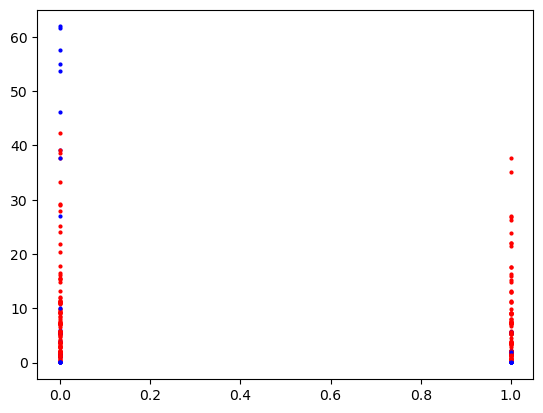

In [17]:
xs = []
ys = []
for pat in df.index:
    x = 0
    clr = 'b'
    if df.loc[pat]['PFS_P_CNSR'] == 1:
        clr = 'r'
    if df.loc[pat]['TRT01P'] == 'NIVOLUMAB':
        plt.plot(0, df.loc[pat]['PFS_P'], 'o', markersize = 2, color = clr)
    else:
        plt.plot(1, df.loc[pat]['PFS_P'], 'o', markersize = 2, color = clr)
plt.show()